C:\Users\siber\Anaconda3\lib\site-packages\ipykernel\__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


{2: 2501, 3: 321, 0: 434, 1: 163}
{0: 2501, 1: 321, 3: 434, 2: 163}


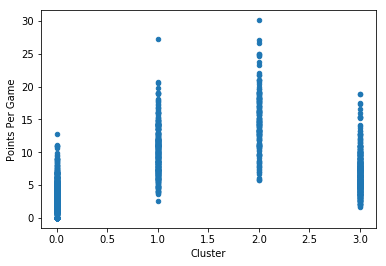

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


df = pd.read_csv("draftInfo.csv")
df.head()
df1 = df.drop(["Year", "Player", "Position", "NBA Team", "Prev Team", ], axis=1)
df1.head()


# Get specific columns
games = df1[['Round', 'Pick', 'Games Started', 'Games Played', 'Minutes']]
games_clust = KMeans(n_clusters=4)
games_clust.fit(games)
gc = games_clust.fit_predict(games)
# Do it on everything
all_clust = KMeans(n_clusters=4)
all_clust.fit(df1)
ac = all_clust.fit_predict(df1)



# Create new column for cluster
games["GCluster"] = gc
df1["Cluster"] = ac

all_val = {}
val = {} # Store number in each cluster
for clust in games["GCluster"]:
    val[clust] = val.get(clust, 0) + 1

for clust in df1["Cluster"]:
    all_val[clust] = all_val.get(clust, 0) + 1
    
print(val)
print(all_val)

'''
# df1.plot(kind='scatter', x='Round', y='Points Per Game')
games.plot(kind='scatter', x='GCluster', y='Minutes')
games.plot(kind='scatter', x='GCluster', y='Games Started')
games.plot(kind='scatter', x= 'GCluster', y='Games Played')
games.plot(kind='scatter', x='GCluster', y='Round')
games.plot(kind='scatter', x='GCluster', y='Pick')
'''
# For everything together
df1.plot(kind='scatter', x='Cluster', y='Points Per Game')
#df1.plot(kind='scatter', x='Cluster', y='Pick')
#df1.plot(kind='scatter', x='Cluster', y='Round')
#df1.plot(kind='scatter', x='Cluster', y='Minutes')
# df1.plot(kind='scatter', x='Cluster', y=["Round", "Pick", "Games Played"])

In [ ]:
%matplotlib inline